# カーネル主成分分析を使った非線形写像
- 機械学習の多くのアルゴリズムは、入力データの線形分離性の前提を設けている
- ここまで取り上げてきた他のアルゴリズムは、線形分離性が完全で無いのはノイズのためであることを前提としている。
- ここではカーネルかしたカーネルPCAを取り扱う
- カーネルPCAを使って、線形分離できないデータを変換し、線形分類器に適した新しい低次元の部分空間へ射影する方法を学ぶ。

# 5.3.1 カーネル関数とカーネルトリック
- 非線形問題を解くには、より高い次元の新しい特徴空間へ射影し、そこで線形分離可能な状態にする。
- 高い次元へ変換するために射影関数$\phi$を定義する。
$$\phi : \mathbb{R}^{d}　→ \mathbb{R}^{k} \, (k>>d)$$
- $\phi$は、元のd次元のデータセットを、より高いk次元の特徴空間に写像するために、元の特徴量の非線形的な組み合わせを作成する。
- 例えば、$\vec{x}$をd個の特徴量からなる列ベクトルとし、２次元(d=2)の特徴ベクトル$\vec{x} \in \mathbb{R}^{d}$があるとすると、3次元空間に以下の様に写像する。
$$\vec{x} = [x_{1},x_{2}]^{T}$$
$$↓\phi$$
$$\vec{z}=[x^{2}_{1},\sqrt{2x_{1}x_{2}},x^{2}_{2}]$$
- カーネルPCAを使用することで、データをより高次元の空間に変換する非線形写像を実行する。
- この高次元空間に対して標準のPCAを適用し、より低次元の空間へデータを再び射影し、サンプルを線形分類器に分離できるようにする。
- その際には、入力空間においてデータの密度によりサンプルを分離できることが前提となるが、この方法では計算コストが大きすぎる。
- カーネルトリックにより、高次元空間に写像することなる、元の特徴空間において２つの高次元の特徴ベクトルの類似度を計算できる。
- PCAでは共分散行列を利用した。
$$\sum = \frac{1}{n} \sum^{n}_{i=1} \vec{x}^{(i)} \vec{x}^{(i)T}$$
- この手法は一般化されており、元の特徴空間でのサンプル間の内積を、$\phi$を使って非線形の特徴量の組み合わせに置き換えることができる。
$$\sum = \frac{1}{n} \sum^{n}_{i=1}\phi(\vec{x}^{(i)}) \phi(\vec{x}^{(i)})^{T}$$
- この共分散行列から固有ベクトル（主成分）を取り出すには、以下の方程式を解く必要がある。
$$\sum \vec{\nu} =\lambda\vec{nu} $$
$$\frac{1}{n} \sum^{n}_{i=1}\phi(\vec{x}^{(i)}) \phi(\vec{x}^{(i)})^{T} \vec{nu} = \lambda \vec{\nu}$$
$$\vec{\nu} = \frac{1}{n \lambda}\sum^{n}_{i=1} \phi(\vec{x}^{(i)}) \phi(\vec{x}^{(i)})^{T}\vec{\nu} = \frac{1}{n}\sum^{n}_{i=1} \vec{a}^{(i)} \phi(\vec{x}^{(i)})$$
- ここで$\lambda$と$\vec{\nu}$は共分散行列$\sum$の固有値と固有ベクトルである。
- $\vec{a}$を取得するには、カーネル（類似度）行列$\vec{K}$の固有ベクトルを抽出すれば良い
$$\sum = \frac{1}{n}\sum^{n}_{i=1} \phi(\vec{x}^{(i)}) \phi(\vec{x}^{(i)})^{T} = \frac{1}{n} \phi(\vec{X})^{T} \phi(\vec{X})$$
- この場合の$\phi(\vec{X})$はn×k行列である
- 固有ベクトル方程式は以下のように記述できる
$$\vec{\nu} = \frac{1}{n} \sum^{n}_{i=1} \vec{a}^{(i)} \phi(\vec{x}^{(i)}) = \lambda \phi(\vec{X})^{T} \vec{a}$$
- $\sum \vec{\nu} = \lambda \vec{\nu}$であることを利用する。以下計算省略
$$\vec{K} = \phi(\vec{X}) \phi(\vec{X})^{T}$$

- カーネルトリックを利用することによって、サンプル$\vec{x}$の関数$\phi$同士の内積の計算をカーネル関数$\vec{K}$により回避する。
- 固有ベクトルを明示的に計算数必要がなくなる
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = \phi(\vec{x}^{(i)})^{T}\phi(\vec{x}^{(j)})$$
- カーネルPCAのあとに取得するのは、それぞれの成分にすでに射影されているサンプルである。
- 標準のPCAと異なり、変換行列は生成しない。
- 基本的にカーネル関数については、２つのベクトル間の内積、つまり類似度の目安を計算する関数とみなすことができる。
- 多項式カーネル。$\theta$は閾値、Pはユーザが指定しなければいけない指数
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = (\vec{x}^{(i)T} \vec{x}^{(j)} + \theta)^{P}$$
- 双曲線正接（S字）カーネル
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = tanh(\eta \vec{x}^{(i)T} \vec{x}^{(j)} + \theta)$$
- 動径基底関数（RBF）またはガウスカーネル。
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = exp\left( - \frac{\| \vec{x}^{(i)}-\vec{x}^{(j)} \|^{2}}{2\sigma^{2}}  \right)$$
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = exp\left( - \gamma \| \vec{x}^{(i)}-\vec{x}^{(j)} \|^{2} \right)$$

- RBFカーネルPCAの実装は、以下の３ステップにまとめることができる

１．カーネル（類似度）行列$\vec{K}$を計算し、そこで以下の計算を行う必要がある。以下の計算をサンプルペア毎に行う。
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = exp\left( - \gamma \| \vec{x}^{(i)}-\vec{x}^{(j)} \|^{2} \right)$$
$$\vec{K} = \begin{bmatrix} k(\vec{x}^{(1)},\vec{x}^{(1)}) & k(\vec{x}^{(1)},\vec{x}^{(2)}) & \ldots  & k(\vec{x}^{(1)},\vec{x}^{(n)}) \\ k(\vec{x}^{(2)},\vec{x}^{(1)}) & k(\vec{x}^{(2)},\vec{x}^{(2)}) & \ldots  & k(\vec{x}^{(2)},\vec{x}^{(n)}) \\ \vdots & \vdots & \ddots & \vdots \\ k(\vec{x}^{(n)},\vec{x}^{(1)}) & k(\vec{x}^{(n)},\vec{x}^{(2)}) & \ldots  & k(\vec{x}^{(n)},\vec{x}^{(n)}) \end{bmatrix}$$
- 例えば、データセットにトレーニングサンプルが100個含まれている場合ペアごとの類似度からなる対象カーネルは行列は100×100次元になる

２．カーネル行列$\vec{K}$の中心化を行う
$$\vec{K}^{''} = \vec{K} - \vec{l_{n}}\vec{K}-\vec{K}\vec{l_{n}} + \vec{l_{n}}\vec{K}\vec{l_{n}}$$
- $\vec{l}_{n}$はすべての値が$\frac{1}{n}$のn×n次元の行列である。（次元の数はカーネル関数と同じ）

３．対応する固有値に基づき、中心化されたカーネル行列のk個のベクトルを収集する。この場合、固有値は大きい順にランク付けされている。標準のPCAとは対処的に、固有ベクトルは主成分軸ではなく、それらの軸に射影されるサンプルである。

- これまでは標準化されたデータを使うことが前提となっていたが、新しい特徴空間を明示的に計算せず、新しい特徴空間でも中心が0であることを保証できないから中心化する。

# 5.3.2 pythonでカーネル主成分分析を実装する。
- RBFカーネルPCAをpythonで実装する

In [15]:
from scipy.spatial.distance import pdist,squareform #pdistは距離関数
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_components):
    """RBFカーネルPCAの実装
    
    パラメータ
    ------------
    X:{Numpy array}, shape = [n_samples,n_features]
    
    gamma: float
        RBFカーネルのチューニングパラメータ
        
    n_components: int
        返される主成分の個数
        
    戻り値
    ------------
    X_pc:{Numpy array},shape=[n_samples,n_features]
        射影されたデータセット
    """
    #M×N次元のデータセットでペア毎に平方ユーグリッド距離を計算
    sq_dists = pdist(X,'sqeuclidean')
    
    #ペアごとの距離を正方行列に変換
    mat_sq_dists = squareform(sq_dists)
    
    #対象カーネル行列を計算
    K = exp(-gamma*mat_sq_dists)
    
    #カーネル行列を中心化
    N = K.shape[0]
    one_n = np.ones((N,N)) / float(N)
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #中心化されたカーネル行列から固有値を取得
    #numpy.eighはそれらをソート順に返す
    eigvals,eigvecs = eigh(K)
    
    #上位K個の固有ベクトル（射影されたサンプル）を収集
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    return X_pc

- RBFカーネルPCAを次元削減に使用する場合は、問題点が１つあり、それは、パラメータγを推定値として指定しなければならないことだ
- γを見つけ出すには実験が必要である。

# 例1：半月形の分離

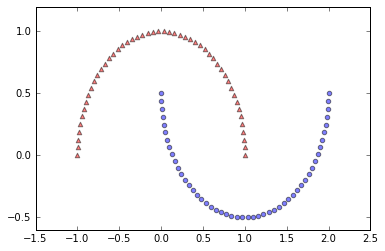

In [7]:
#２つの半月形データを作成してプロット
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,random_state=123)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],c='b',marker='o',alpha=0.5)
plt.show()

- これらの２つの半月形を線形分離できないことは明らかである。
- ここでの目標は半月を展開し、データセットを線形分類器に適した入力にすることである。

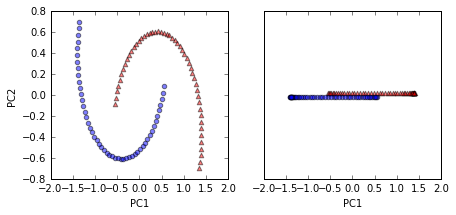

In [8]:
import numpy as np
#PCAを使って、主成分に射影するとどうなるかを見てみる。

from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
# グラフの数と配置指定
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#1番めの領域に散布図をプロット
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],c='r',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],c='b',marker='o',alpha=0.5)

#2番目のグラフ領域に散布図をプロット
ax[1].scatter(X_spca[y==0,0],np.zeros((50,1))+0.02,c='r',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((50,1))-0.02,c='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

- 標準のPCAを使って変換したデータセットでは、線形分類器が十分な性能を出せないことは明白である。

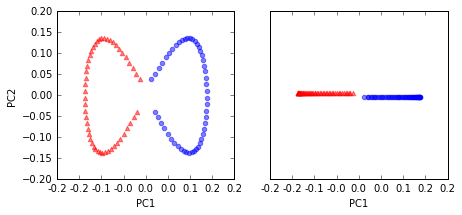

In [20]:
#前に実装したカーネルPCA関数を試す。
from matplotlib.ticker import FormatStrFormatter
# カーネルPCA関数を実行（データ、チューニングパラメータ、次元数を指定）
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

- 残念ながら、チューニングパラメータγには、様々なデータセットでうまく行くような都合の良い値はない。与えられた問題に適したγの値を見つけ出すには、実験が必要である。

# 例2：同心円の分離

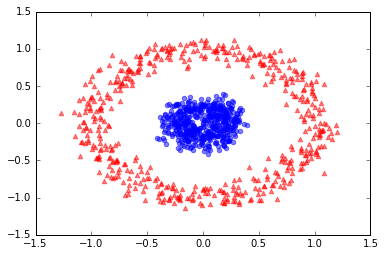

In [22]:
#同心円用のデータを作成してプロット
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

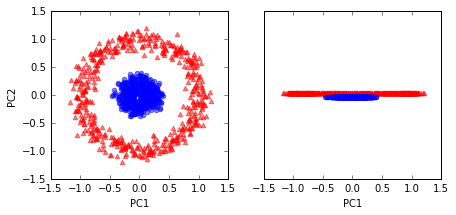

In [25]:
#標準のPCAのアプローチ
#データをPCAで変換してからプロット
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

- やはり標準のPCAでは、線形分類器のトレーニングに適した結果を出せない
- γの値が適切であるという前提で、RBFカーネルPCAの実装を使ったほうがうまく行くかどうか試す。

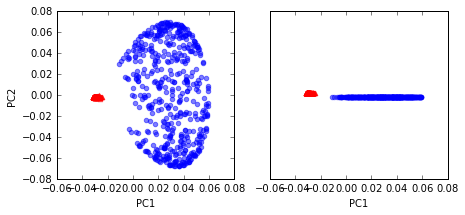

In [26]:
#データをRBFカーネルPCAで変換してからプロット
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

- この場合も、RBFカーネルPCAにより、２つのクラスが線形分離可能となる新しい部分空間にデータが射影されている。